In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv('titanic_toy.csv')

In [11]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [19]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [21]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [27]:
x_train.isnull().mean()

Age       0.19382
Fare      0.05618
Family    0.00000
dtype: float64

In [29]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [33]:
mean_age,median_age,mean_fare,median_fare

(30.065191637630658, 28.0, 33.577770684523806, 14.4583)

In [35]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)

x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [37]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
426,28.0,26.0000,1,28.000000,28.0,26.0000,26.0000
286,30.0,9.5000,0,30.000000,30.0,9.5000,9.5000
825,NaN,6.9500,0,30.065192,28.0,6.9500,6.9500
358,NaN,7.8792,0,30.065192,28.0,7.8792,7.8792
37,21.0,8.0500,0,21.000000,21.0,8.0500,8.0500


In [39]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  215.49349481486885
Age Variance after median imputation:  174.3351161672909
Age Variance after mean imputation:  173.6677532052319
Original Fare variable variance:  2832.3742465692885
Fare Variance after median imputation:  2692.438559490079
Fare Variance after mean imputation:  2673.0282973952076


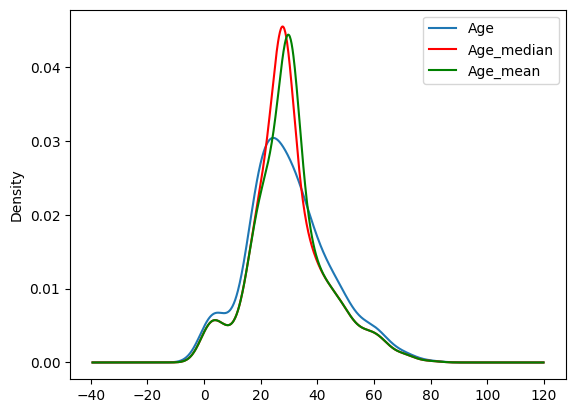

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

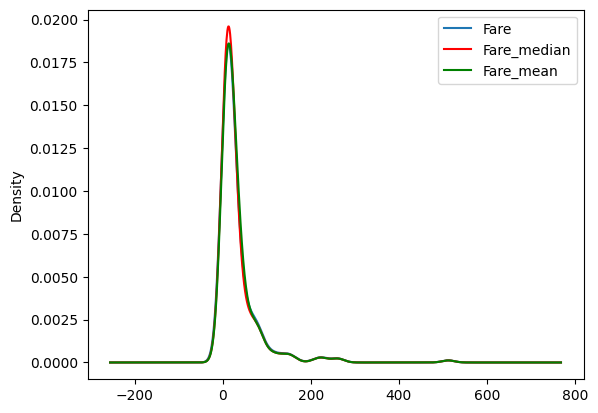

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [45]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.065794,-0.302707,1.000000,1.000000,0.064077,0.063090
Fare,0.065794,1.000000,0.210238,0.062698,0.068929,1.000000,1.000000
Family,-0.302707,0.210238,1.000000,-0.255808,-0.251573,0.207224,0.206952
Age_mean,1.000000,0.062698,-0.255808,1.000000,0.998084,0.061162,0.060261
Age_median,1.000000,0.068929,-0.251573,0.998084,1.000000,0.067237,0.066174
Fare_mean,0.064077,1.000000,0.207224,0.061162,0.067237,1.000000,0.996389
Fare_median,0.063090,1.000000,0.206952,0.060261,0.066174,0.996389,1.000000


<Axes: >

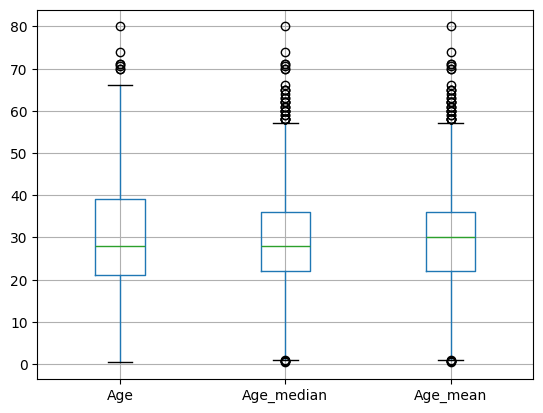

In [47]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

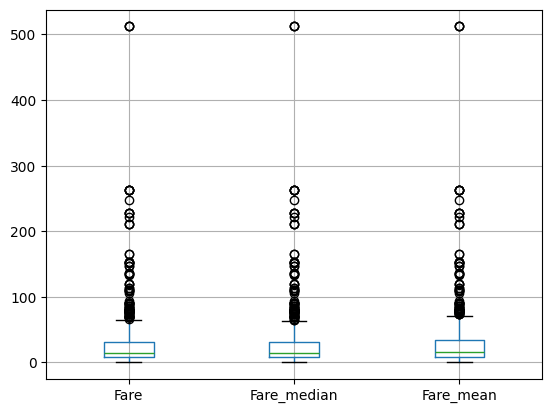

In [49]:
x_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Using Sklearn

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [54]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [56]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [58]:
trf.fit(x_train)

C:\Users\Admin\anaconda3\envs\condaenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [60]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [62]:
trf.named_transformers_['imputer2'].statistics_

array([31.00407356])

In [64]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [66]:
x_train

array([[28.   ,  8.05 ,  0.   ],
       [28.   ,  7.25 ,  0.   ],
       [21.   ,  7.925,  0.   ],
       ...,
       [28.   , 69.55 , 10.   ],
       [31.   , 20.525,  2.   ],
       [31.   , 57.   ,  1.   ]])